 ## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

## Read the Data

In [2]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Understanding the data

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [9]:
bank.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [10]:
bank.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [11]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
bank[bank.duplicated()].shape

(0, 17)

In [13]:
discrete_feature = [feature for feature in bank.columns if len(bank[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [14]:
discrete_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
continuous_feature = [feature for feature in bank.columns if bank[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [16]:
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Exploratory Data Analysis

In [17]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


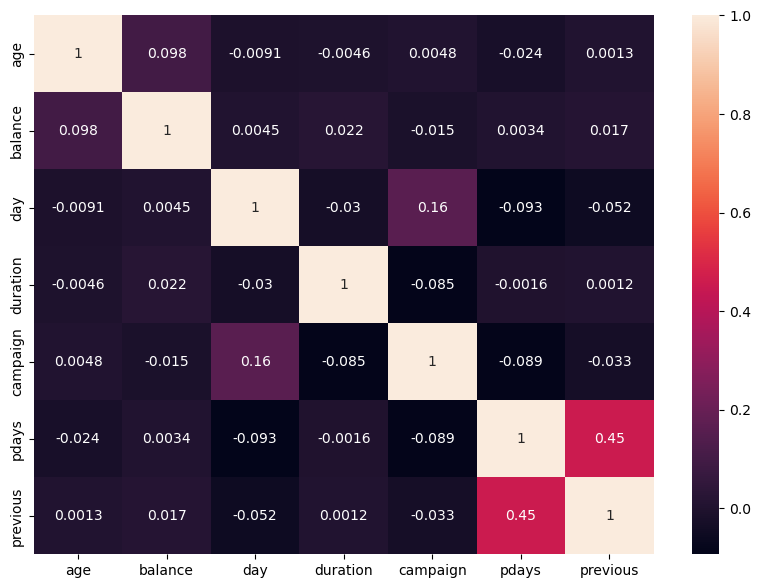

In [18]:
fig = plt.figure(figsize= (10,7))
sns.heatmap(bank.corr(),annot=True)
plt.show()

### Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

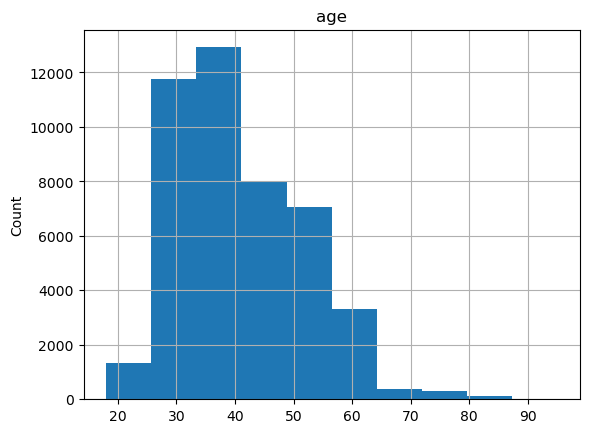

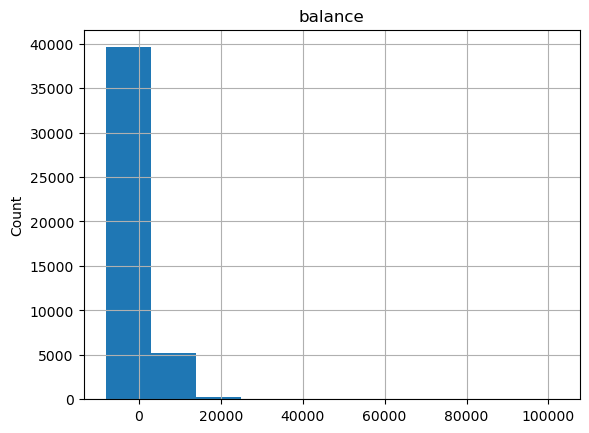

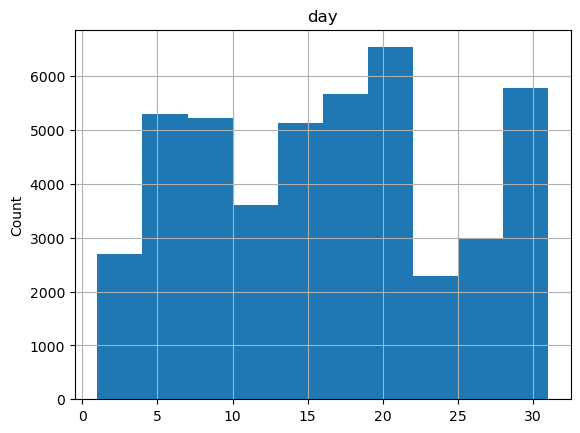

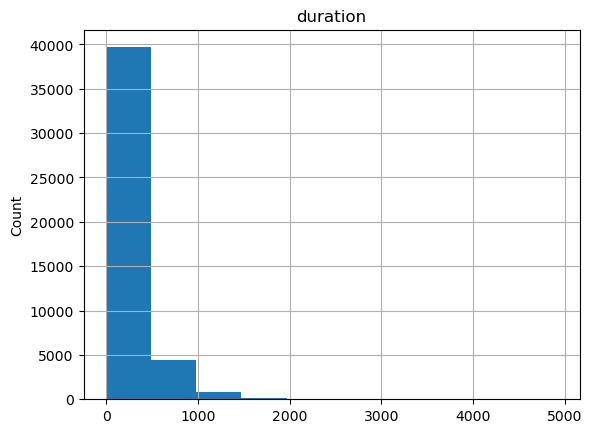

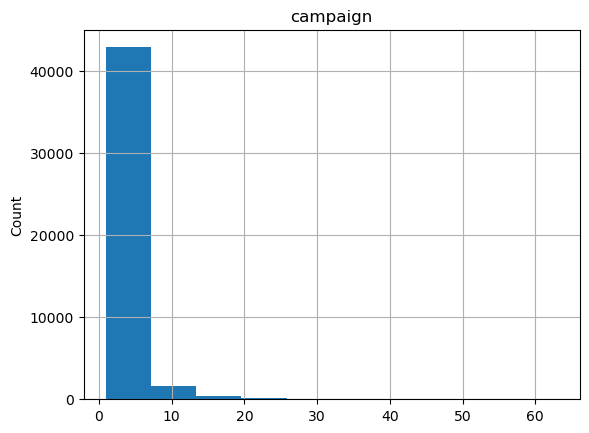

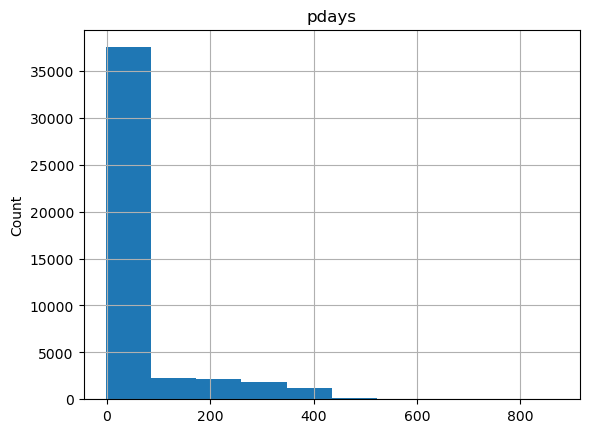

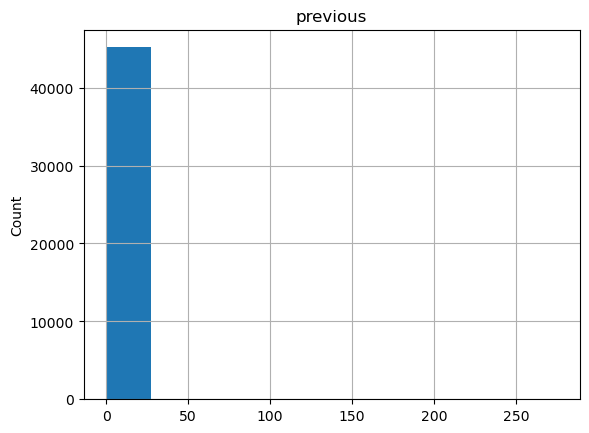

In [19]:
for feature in continuous_feature:
    bank1 = bank.copy()
    bank1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Outliers Detection

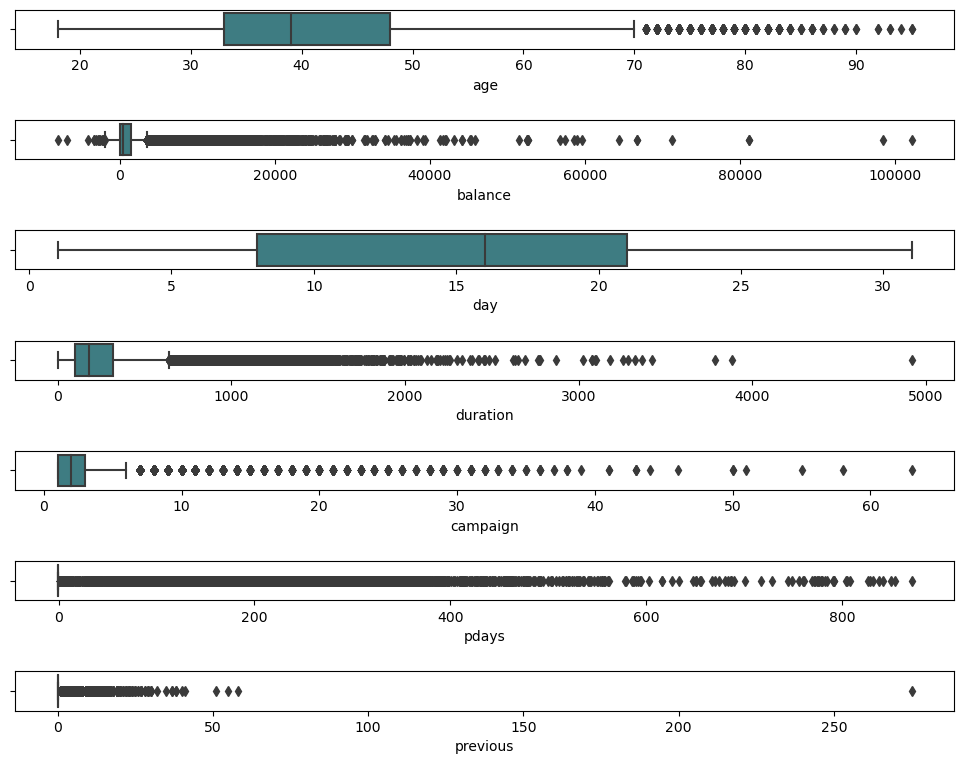

In [20]:
outlier = bank.copy() 
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [21]:
#There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity
# And can be important for model building

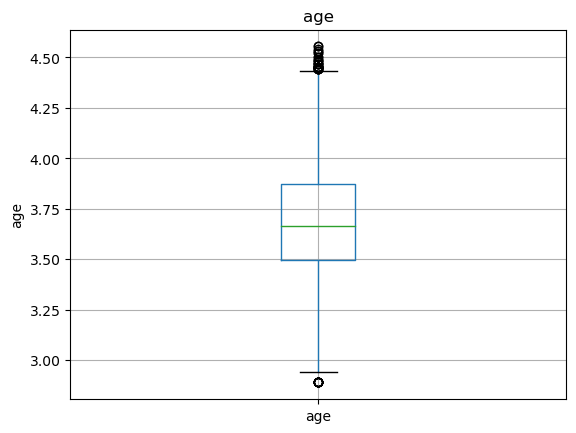

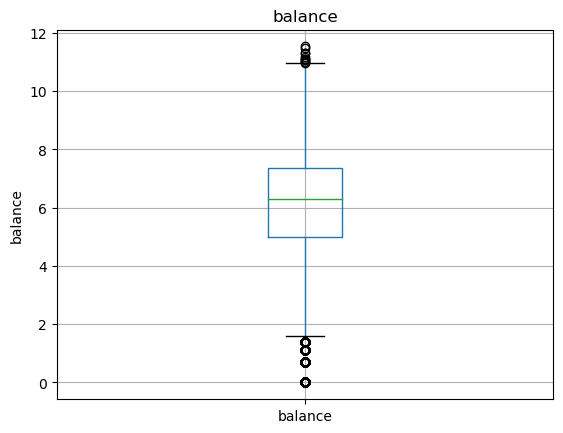

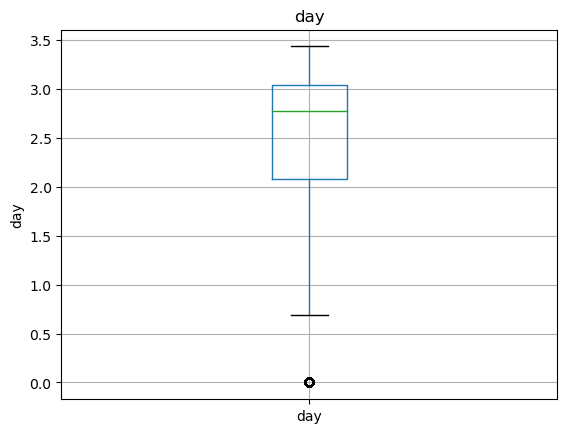

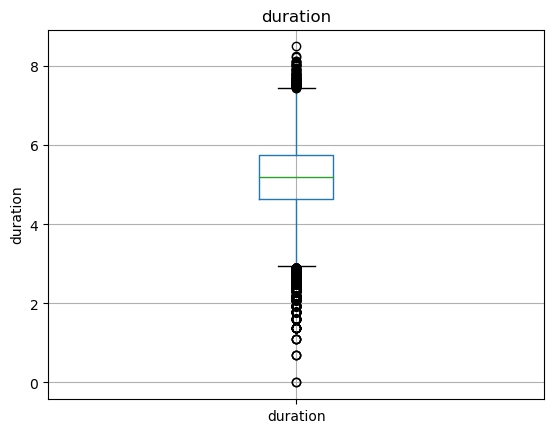

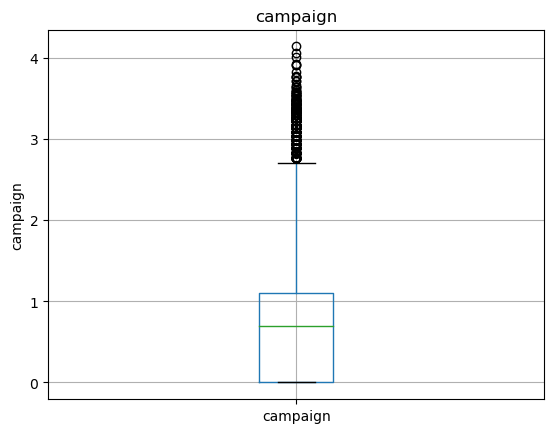

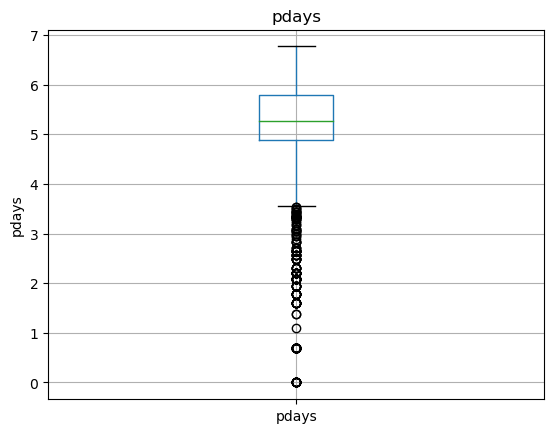

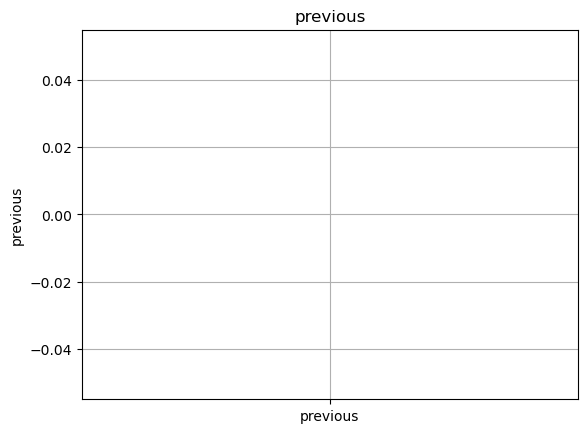

In [22]:
for feature in continuous_feature:
    bank3 = bank.copy()
    bank3[feature] = np.log(bank3[feature])
    bank3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Data Preprocessing

In [23]:
bank[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_new = bank

In [24]:
 bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Label Encoding

In [25]:
bank_new['month'] = bank_new['month'].cat.codes
bank_new['job'] = bank_new['job'].cat.codes
bank_new['marital'] = bank_new['marital'].cat.codes
bank_new['education'] = bank_new['education'].cat.codes
bank_new['default'] = bank_new['default'].cat.codes
bank_new['housing'] = bank_new['housing'].cat.codes
bank_new['loan'] = bank_new['loan'].cat.codes
bank_new['contact'] = bank_new['contact'].cat.codes
bank_new['poutcome'] = bank_new['poutcome'].cat.codes
bank_new['y'] = bank_new['y'].cat.codes

## Model Building

In [26]:
X1 = bank_new.drop('y', axis=1)
y1 = bank_new[['y']]

In [27]:
X1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [28]:
y1.head()

,y
0,0
1,0
2,0
3,0
4,0


In [29]:
# Create the model
from sklearn.linear_model import LogisticRegression

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.20,random_state=42)
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [31]:
logistic_model =LogisticRegression()

In [32]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
logistic_model.coef_

array([[-2.32549311e-02,  1.76743724e-02, -1.14046644e-01,
        -2.07293540e-02, -6.02634882e-03,  3.13101041e-05,
        -2.16585091e-01, -6.20362870e-02, -2.22776510e-01,
        -1.87091823e-02, -7.15361653e-02,  3.51293896e-03,
        -3.15617447e-01, -1.13054522e-03,  1.40891814e-01,
        -2.19476887e-01]])

In [34]:
logistic_model.intercept_

array([-0.08449423])

In [35]:
### Predict for training data
yhat_train = logistic_model.predict(X_train)

In [36]:
yhat_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train_cm=confusion_matrix(y_train,yhat_train)

In [39]:
train_cm

array([[31388,   582],
       [ 3456,   742]], dtype=int64)

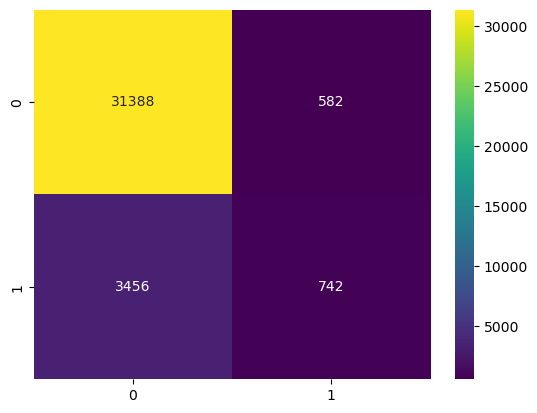

In [40]:
sns.heatmap(train_cm, annot=True, fmt='d', cmap='viridis')
plt.show()

In [41]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [42]:
accuracy_score(y_train,yhat_train)

0.8883543463835435

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

In [44]:
logistic_model.predict_proba(X_train)

array([[0.96586786, 0.03413214],
       [0.93174161, 0.06825839],
       [0.97000985, 0.02999015],
       ...,
       [0.87204397, 0.12795603],
       [0.93244908, 0.06755092],
       [0.99634352, 0.00365648]])

In [45]:
proba_true = logistic_model.predict_proba(X_train)[:,1]
proba_true

array([0.03413214, 0.06825839, 0.02999015, ..., 0.12795603, 0.06755092,
       0.00365648])

In [46]:
fpr,tpr,threshold = roc_curve(y_train,proba_true)
auc = roc_auc_score(y_train,proba_true)
auc

0.8195911990502054

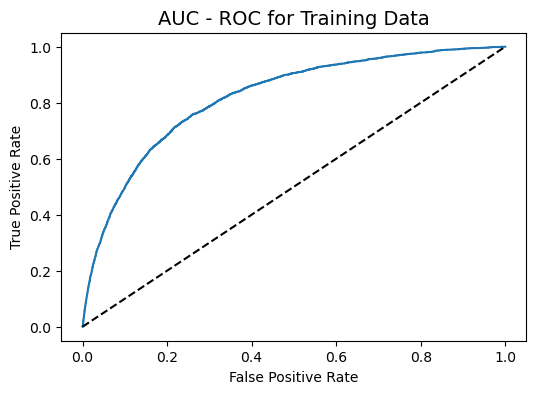

In [47]:
plt.figure(figsize=(6,4))
plt.title('AUC - ROC for Training Data', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [48]:
classification_report1 = classification_report(y_train,yhat_train)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



### Test Data

In [49]:
yhat_test1 = logistic_model.predict(X_test)

In [50]:
print(confusion_matrix(y_test,yhat_test1))

[[7803  149]
 [ 899  192]]


In [51]:
print(classification_report(y_test,yhat_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



In [52]:
accuracy_score(y_test,yhat_test1)

0.8841092557779497

In [53]:
logistic_model.predict_proba(X_test)

array([[0.95006655, 0.04993345],
       [0.96189639, 0.03810361],
       [0.82447159, 0.17552841],
       ...,
       [0.96389665, 0.03610335],
       [0.96424096, 0.03575904],
       [0.94279983, 0.05720017]])

In [54]:
proba_true1 = logistic_model.predict_proba(X_test)[:,1]
proba_true1

array([0.04993345, 0.03810361, 0.17552841, ..., 0.03610335, 0.03575904,
       0.05720017])

AUC score : 81.56%


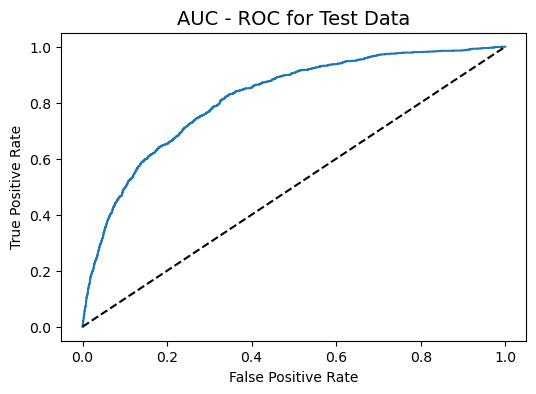

In [55]:
fpr,tpr,threshold = roc_curve(y_test,proba_true1)
auc = roc_auc_score(y_test,proba_true1)
print('AUC score : {:.2f}%'.format(auc*100))
plt.figure(figsize=(6,4))
plt.title('AUC - ROC for Test Data', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [56]:
classification_report2 = classification_report(y_test,yhat_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



## Compare the train-set and test-set accuracy

In [57]:
print('Training set score : {:.2f}%'.format(logistic_model.score(X_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(X_test, y_test)*100))

Training set score : 88.84%
Test set score     : 88.41%


## Model Deployment

In [64]:
from pickle import dump

In [65]:
dump(logistic_model,open('Bank_Prediction.pkl','wb'))

In [66]:
from pickle import load

In [67]:
loaded_logistic_model = load(open('Bank_Prediction.pkl','rb'))

In [68]:
yhat_train = loaded_logistic_model.predict(X_test)